<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
start='2017-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)

[*********************100%***********************]  1 of 1 completed


In [75]:
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]
data

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2017-01-03,1160.400024
2017-01-04,1163.800049
2017-01-05,1179.699951
2017-01-06,1171.900024
2017-01-09,1183.500000
...,...
2021-12-17,1803.800049
2021-12-20,1793.699951
2021-12-21,1787.900024


In [76]:
data.rename(columns={"Adj Close": 'Price'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
data.head()

,Price
Date,
2017-01-03,1160.400024
2017-01-04,1163.800049
2017-01-05,1179.699951
2017-01-06,1171.900024
2017-01-09,1183.500000


In [65]:
data.tail()

,Price
Date,
2021-12-17,1803.800049
2021-12-20,1793.699951
2021-12-21,1787.900024
2021-12-22,1801.599976
2021-12-23,1811.199951


## **EDA**

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2017-01-03 to 2021-12-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1254 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB


In [67]:
fig = px.line(data, x=data.index, y="Price",title=" Gold Price movement throughout our Observation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

**Alternative Way to draw line chart**

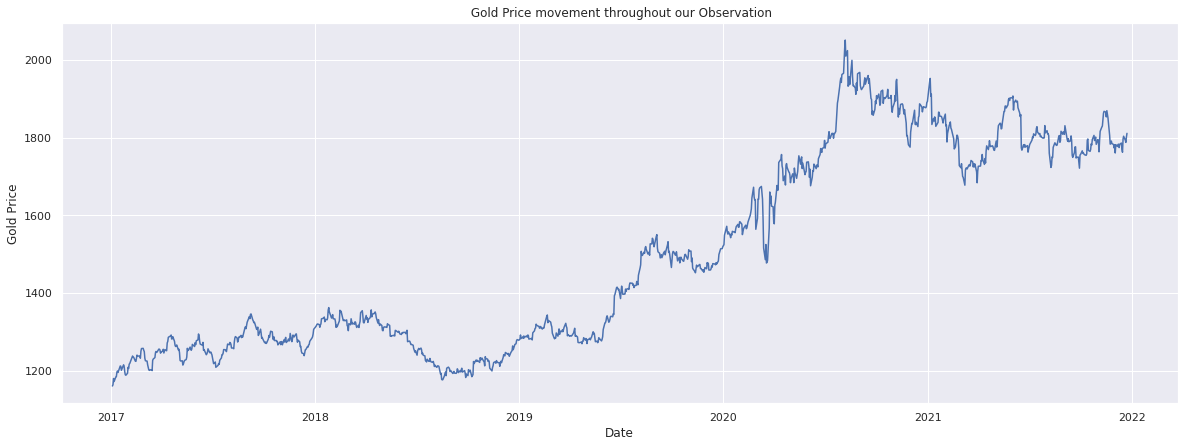

In [77]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.set(style='darkgrid')
sns.lineplot( y="Price", x="Date", data=data)
#sns.lineplot( y="Price", x=data.index, data=data)
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

**Another Way to draw line chart**

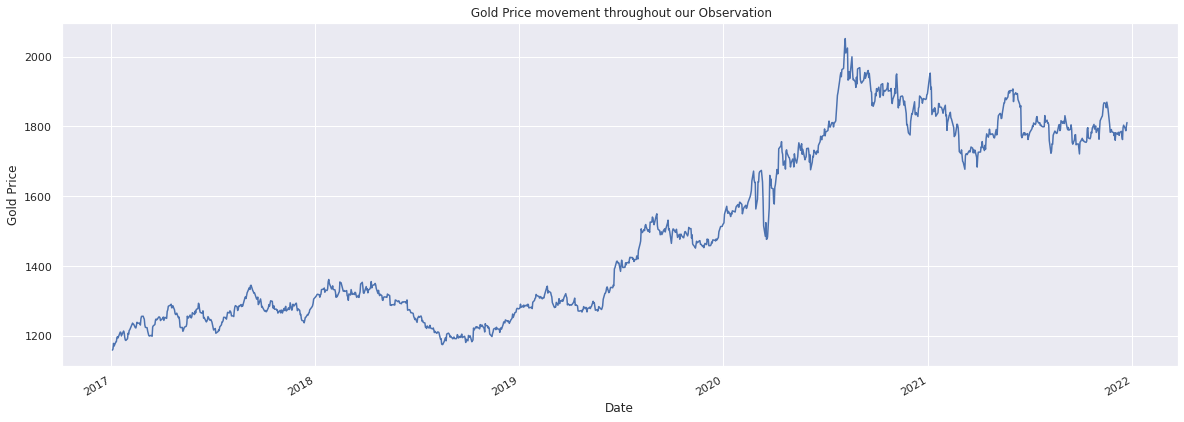

In [69]:
#from IPython.core.pylabtools import figsize
plt.figure(figsize=(20,7))
data.Price.plot()
plt.title(" Gold Price movement throughout our Observation")
plt.ylabel('Gold Price')
plt.show()

In [70]:
#creating a index column
data = data.reset_index()

In [71]:
data

,Date,Price
0,2017-01-03,1160.400024
1,2017-01-04,1163.800049
2,2017-01-05,1179.699951
3,2017-01-06,1171.900024
4,2017-01-09,1183.500000
...,...,...
1249,2021-12-17,1803.800049
1250,2021-12-20,1793.699951
1251,2021-12-21,1787.900024
1252,2021-12-22,1801.599976


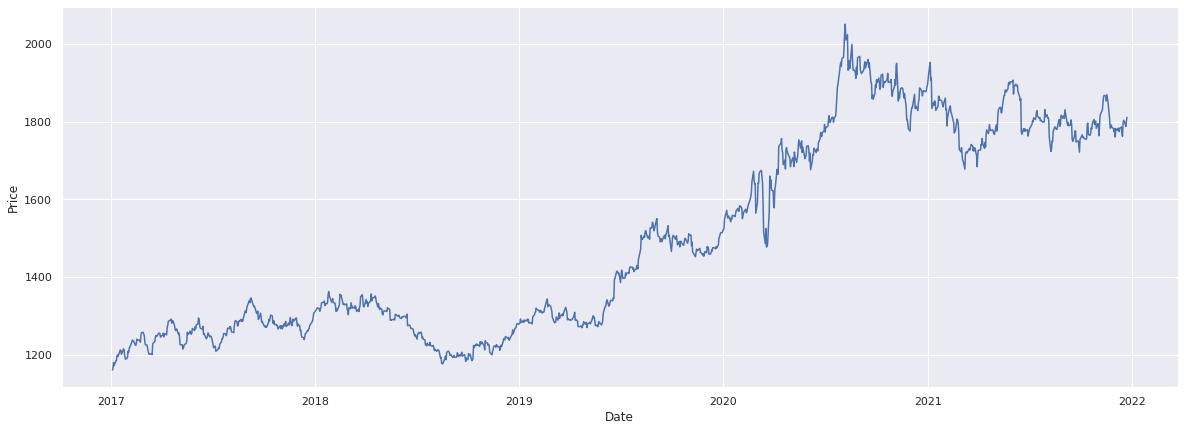

In [74]:
plt.figure(figsize=(20,7))
sns.lineplot( y="Price", x="Date", data=data)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1254 non-null   datetime64[ns]
 1   Price   1254 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.7 KB


In [52]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [53]:
print(len(data))

1254


In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1254.0,1497.526953,253.705245,1160.400024,1275.400024,1408.799988,1769.624969,2051.5


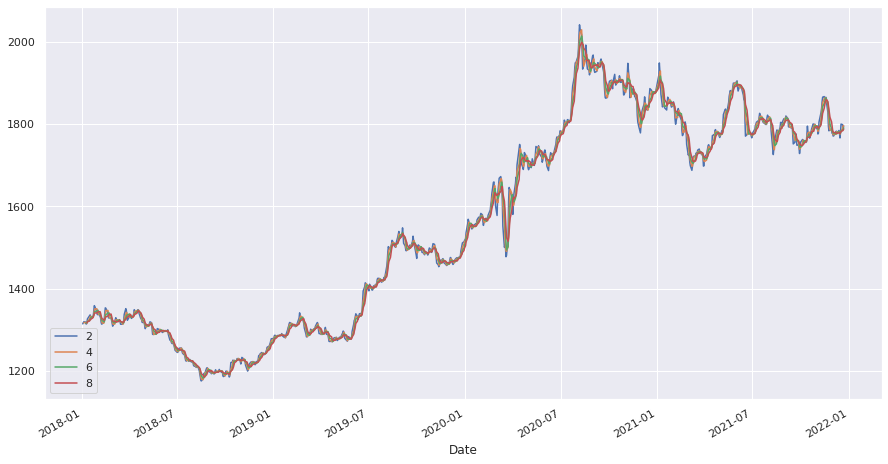

In [ ]:
plt.figure(figsize=(15,8))
for i in range(2,10,2):
    data["Price"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

In [ ]:
df=data.copy()

In [ ]:
df=df.reset_index()

In [ ]:
data2=df.resample("M",on="Date").mean()

In [ ]:
fig = px.line(data2, x=data2.index, y="Price",title=" Gold Price movement throughout our Observation with Month variation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

In [ ]:
result=seasonal_decompose(data2['Price'],model='additive')

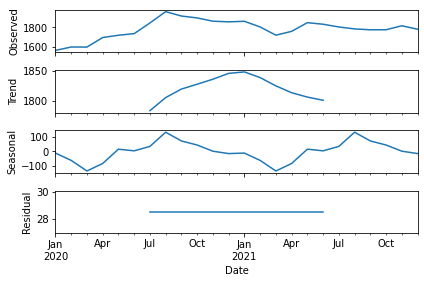

In [ ]:
result.plot()
plt.show()

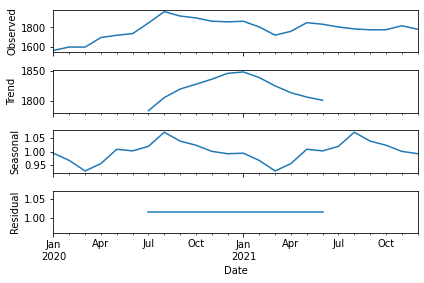

In [ ]:
result1=seasonal_decompose(data2['Price'],model='multiplicable')
result1.plot()
plt.show()

### **Autocorelation Plot**

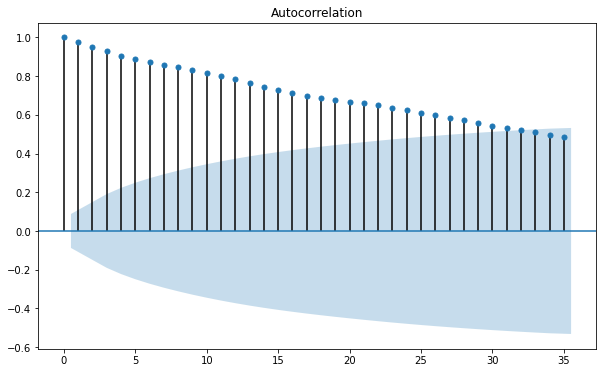

In [ ]:
plt.rc("figure", figsize=(10,6))
plot_acf(data,lags=35)
plt.show()

We can deduct from Auto Correlation Plot that the price of the gold are highly correlated 

### **Partial Auto Correlation Plot**

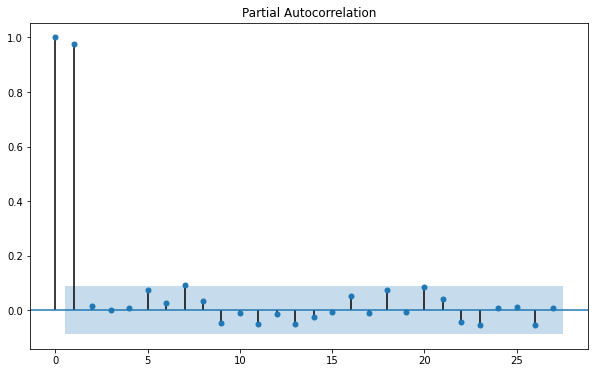

In [ ]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data)
plt.show()

### **Checking for Stationarity in data using Dickey-Fuller test**

In [ ]:
X = data['Price'].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.440984
p-value: 0.130501
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


## **As the p-value > 0.05, we Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

## **DIFFERENCE TRANSFORM to remove Seasonality**

In [ ]:
data_without_sea = data['Price'] - data['Price'].shift(1)

In [ ]:
X = data_without_sea[1:].values

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.345877
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


### **Graphs of data before after removing the temporal dependence in them.**

In [ ]:
fig = px.line(data_without_sea[1:], x=data_without_sea.index[1:], y="Price",title=" Gold Price movement throughout our Observation",labels={"x":"Date","Price":"Gold Prices"})
fig.show()

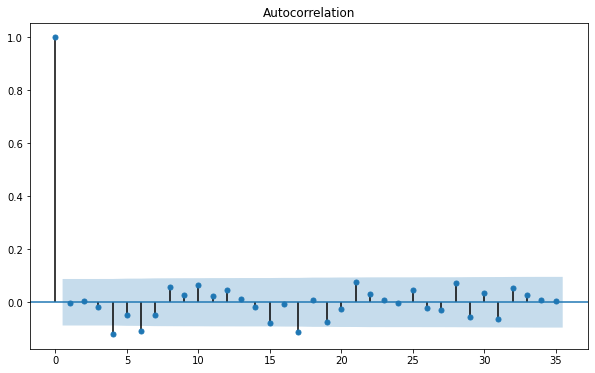

In [ ]:
plt.rc("figure", figsize=(10,6))
plot_acf(data_without_sea[1:],lags=35)
plt.show()

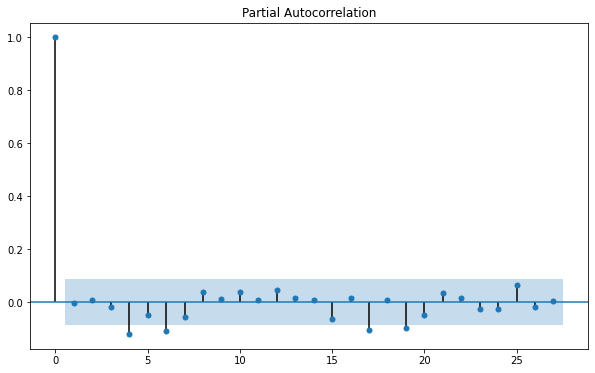

In [ ]:
plt.rc("figure", figsize=(10,6))
plot_pacf(data_without_sea[1:])
plt.show()